In [2]:
# !pip install pycaret
!pip install pycaret
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pycaret
from pycaret.classification import *

df = pd.read_csv("data/processed_data.csv")
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICANT_AGE,YEARS_WORKING,TOTAL_GOOD_DEBT,TOTAL_BAD_DEBT,STATUS
0,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,59.0,3.0,30,0,1
1,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52.0,8.0,5,0,1
2,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52.0,8.0,5,0,1
3,5008810,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52.0,8.0,27,0,1
4,5008811,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52.0,8.0,39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,5149828,M,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Managers,2.0,48.0,7.0,8,4,1
25130,5149834,F,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,34.0,4.0,6,18,0
25131,5149838,F,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,34.0,4.0,15,18,0
25132,5150049,F,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2.0,49.0,2.0,8,2,1


In [3]:
df_modeling = df.sample(frac=0.9, random_state=123)
df_unseen = df.drop(df_modeling.index)

df_modeling.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(df_modeling.shape))
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Data for Modeling: (22621, 21)
Unseen Data For Predictions: (2513, 21)


In [4]:
stp = setup(data = df_modeling, 
            target = 'STATUS',
            train_size = 0.8,
            categorical_features = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                                    'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                    'NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE',
                                    'FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE'], 
            ignore_features = ['ID'],
            fix_imbalance = True,
            silent = True,
            session_id=123)

,Description,Value
0,session_id,123
1,Target,STATUS
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22621, 21)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9994,1.0000,0.9994,1.0000,0.9997,0.9320,0.9363,0.7210
lightgbm,Light Gradient Boosting Machine,0.9992,0.9925,0.9994,0.9997,0.9996,0.8909,0.8956,0.3870
gbc,Gradient Boosting Classifier,0.9989,0.9982,0.9992,0.9997,0.9994,0.8615,0.8670,3.7610
ada,Ada Boost Classifier,0.9986,0.9993,0.9989,0.9997,0.9993,0.8361,0.8420,0.8020
dt,Decision Tree Classifier,0.9982,0.8924,0.9990,0.9992,0.9991,0.7595,0.7631,0.2570
rf,Random Forest Classifier,0.9975,0.9983,1.0000,0.9975,0.9987,0.4217,0.4965,0.8650
et,Extra Trees Classifier,0.9971,0.9899,0.9997,0.9974,0.9986,0.3938,0.4590,0.8660
knn,K Neighbors Classifier,0.9915,0.7788,0.9934,0.9980,0.9957,0.2845,0.3085,0.4750
lda,Linear Discriminant Analysis,0.9577,0.9576,0.9583,0.9992,0.9783,0.1168,0.2226,0.2200
ridge,Ridge Classifier,0.9565,0.0000,0.9570,0.9992,0.9777,0.1135,0.2192,0.0560


In [6]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

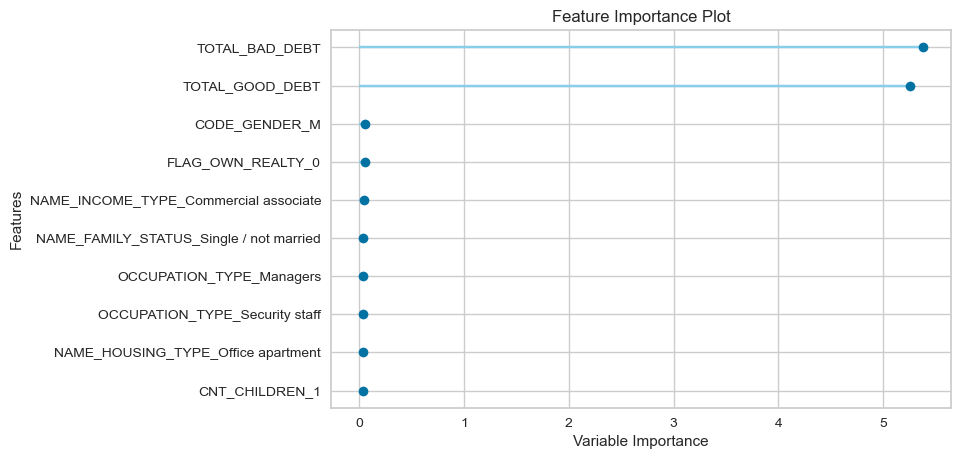

In [7]:
plot_model(best_model, plot='feature')

In [10]:
df_modeling
df_unseen

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICANT_AGE,YEARS_WORKING,TOTAL_GOOD_DEBT,TOTAL_BAD_DEBT,STATUS
0,5008825,F,1,0,0,130500.0,Working,Incomplete higher,Married,House / apartment,...,0,0,0,Accountants,2.0,29.0,3.0,25,1,1
1,5008831,F,0,1,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,1,0,Laborers,2.0,27.0,4.0,18,2,1
2,5008840,M,0,1,1,405000.0,Commercial associate,Higher education,Married,House / apartment,...,0,0,0,Managers,3.0,32.0,6.0,56,0,1
3,5008857,F,1,1,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,4.0,43.0,9.0,28,0,1
4,5008861,F,1,1,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,4.0,43.0,9.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,5142741,M,0,0,1,360000.0,Working,Higher education,Married,House / apartment,...,1,1,0,Managers,3.0,30.0,1.0,33,5,1
2509,5146078,F,0,1,1,108000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,1,1,0,Sales staff,1.0,35.0,3.0,40,9,1
2510,5149828,M,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Managers,2.0,48.0,7.0,8,4,1
2511,5149838,F,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,34.0,4.0,15,18,0


In [ ]:
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])